<a href="https://colab.research.google.com/github/pranay999000/matplotlib/blob/main/first_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter array size
24


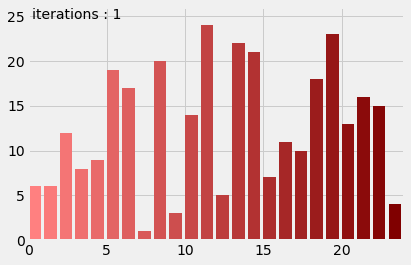

In [24]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib as mp
import numpy as np
import random

plt.style.use('fivethirtyeight')

n = int(input("enter array size\n"))
a = [i for i in range(1, n+1)]
random.shuffle(a)

def insertionsort(a):
	for j in range(1, len(a)):
		key = a[j]
		i = j-1

		while(i >= 0 and a[i] > key):
			a[i+1] = a[i]
			i -= 1

			yield a
		a[i+1] = key
		yield a

generator = insertionsort(a)

data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
	"my_map", {
		"red": [(0, 1.0, 1.0), (1.0, .5, .5)],
		"green": [(0, 0.5, 0.5), (1.0, 0, 0)],
		"blue": [(0, 0.50, 0.5), (1.0, 0, 0)]
	}
)


fig, ax = plt.subplots()

rects = ax.bar(range(len(a)), a, align="edge",
			color=color_map(data_normalizer(range(n))))

ax.set_xlim(0, len(a))
ax.set_ylim(0, int(1.1*len(a)))

text = ax.text(0.01, 0.95, "", transform=ax.transAxes)
iteration = [0]

def animate(A, rects, iteration):

	for rect, val in zip(rects, A):
		rect.set_height(val)

	iteration[0] += 1
	text.set_text("iterations : {}".format(iteration[0]))

anim = FuncAnimation(
    fig,
    func=animate,
    fargs=(rects, iteration), 
    frames=generator, 
    interval=50,
    repeat=False
)

plt.show()
